In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def euler(df, ft, x0, x_end, y0, h, e=1e-6, iters=10000):
    x = np.arange(x0, x_end + h, h) # n точек х
    y = np.zeros_like(x)            # значения у, пока что это нули

    y[0] = y0

    for i in range(len(x) - 1):
        y_pred = y[i] + h * df(x[i], y[i])
        y_corr = y_pred

        for _ in range(iters):
            y_corr_new = y[i] + h / 2 * (df(x[i], y[i]) + df(x[i + 1], y_corr))

            if np.abs(y_corr - y_corr_new) < e:
                y_corr = y_corr_new
                break

            y_corr = y_corr_new

        y[i + 1] = y_corr

    # Сравнение полученного результата с точным решением.
    # Люблю Ванецку ❤
    y_true = ft(x)
    y_err = np.abs(y - y_true)

    return x, y, y_true, y_err

In [19]:
def runge(df, ft, x0, x_end, y0, h):
    x = np.arange(x0, x_end + h, h) # n точек х
    y = np.zeros_like(x)            # значения у

    y[0] = y0

    for i in range(len(x) - 1):
        k1 = h * df(x[i], y[i])
        k2 = h * df(x[i] + h / 2, y[i] + k1 / 2)
        k3 = h * df(x[i] + h / 2, y[i] + k2 / 2)
        k4 = h * df(x[i] + h, y[i] + k3)

        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    y_true = ft(x)
    y_err = np.abs(y - y_true)

    return x, y, y_true, y_err

In [20]:
def adams(df, ft, x0, x_end, y0, h):
    x = np.arange(x0, x_end + h, h) # n точек х
    y = np.zeros_like(x)            # значения у

    y[0] = y0

    for i in range(3):
        k1 = h * df(x[i], y[i])
        k2 = h * df(x[i] + h / 2, y[i] + k1 / 2)
        k3 = h * df(x[i] + h / 2, y[i] + k2 / 2)
        k4 = h * df(x[i] + h, y[i] + k3)

        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    for i in range(3, len(x) - 1):
        y_pred = y[i] + h / 24 * (
            55 * y[i]
            - 59 * y[i - 1]
            + 37 * y[i - 2]
            - 9 * y[i - 3]
        )

        y[i + 1] = y[i] + h / 24 * (
            9 * y_pred
            + 19 * y[i]
            - 5 * y[i - 1]
            + y[i - 2]
        )

    y_true = ft(x)
    y_err = np.abs(y - y_true)

    return x, y, y_true, y_err

In [21]:
x0 = 0.1
x_end = 1.0
y0 = 0
h = 0.1
eps = 1e-10

In [22]:
df = lambda x, y: (y**2 - 1) / x
ft = lambda x: (1 - 100 * x**2) / (1 + 100 * x**2)

In [23]:
x_val, y_euler, y_val, err_euler = euler(df, ft, x0, x_end, y0, h, eps)

print('Метод Эйлера')

table = pd.DataFrame({
    'x': x_val,
    'y': y_euler,
    'y истинное': y_val,
    'погрешность': err_euler
})

print(table)


Метод Эйлера
     x         y    y истинное   погрешность
0  0.1  0.000000 -1.110223e-16  1.110223e-16
1  0.2 -0.645751 -6.000000e-01  4.575131e-02
2  0.3 -0.840445 -8.000000e-01  4.044473e-02
3  0.4 -0.910712 -8.823529e-01  2.835930e-02
4  0.5 -0.943095 -9.230769e-01  2.001793e-02
5  0.6 -0.960591 -9.459459e-01  1.464489e-02
6  0.7 -0.971099 -9.600000e-01  1.109870e-02
7  0.8 -0.977900 -9.692308e-01  8.669023e-03
8  0.9 -0.982553 -9.756098e-01  6.943638e-03
9  1.0 -0.985877 -9.801980e-01  5.679274e-03


In [24]:
_, y_rng, _, err_mng = runge(df, ft, x0, x_end, y0, h)

print('Метод Рунге-Кутта')

table = pd.DataFrame({
    'x': x_val,
    'y': y_rng,
    'y истинное': y_val,
    'погрешность': err_mng
})

print(table)

Метод Рунге-Кутта
     x         y    y истинное   погрешность
0  0.1  0.000000 -1.110223e-16  1.110223e-16
1  0.2 -0.592448 -6.000000e-01  7.552083e-03
2  0.3 -0.795128 -8.000000e-01  4.872395e-03
3  0.4 -0.879282 -8.823529e-01  3.070764e-03
4  0.5 -0.921012 -9.230769e-01  2.065287e-03
5  0.6 -0.944474 -9.459459e-01  1.472274e-03
6  0.7 -0.958901 -9.600000e-01  1.098598e-03
7  0.8 -0.968381 -9.692308e-01  8.495485e-04
8  0.9 -0.974934 -9.756098e-01  6.758250e-04
9  1.0 -0.979648 -9.801980e-01  5.500733e-04


In [25]:
_, y_adm, _, err_adm = adams(df, ft, x0, x_end, y0, h)

print('Метод Адамса')

table = pd.DataFrame({
    'x': x_val,
    'y': y_adm,
    'y истинное': y_val,
    'погрешность': err_adm
})

print(table)

Метод Адамса
     x         y    y истинное   погрешность
0  0.1  0.000000 -1.110223e-16  1.110223e-16
1  0.2 -0.592448 -6.000000e-01  7.552083e-03
2  0.3 -0.795128 -8.000000e-01  4.872395e-03
3  0.4 -0.879282 -8.823529e-01  3.070764e-03
4  0.5 -0.971420 -9.230769e-01  4.834289e-02
5  0.6 -1.073753 -9.459459e-01  1.278068e-01
6  0.7 -1.186687 -9.600000e-01  2.266871e-01
7  0.8 -1.311491 -9.692308e-01  3.422599e-01
8  0.9 -1.449422 -9.756098e-01  4.738119e-01
9  1.0 -1.601859 -9.801980e-01  6.216609e-01


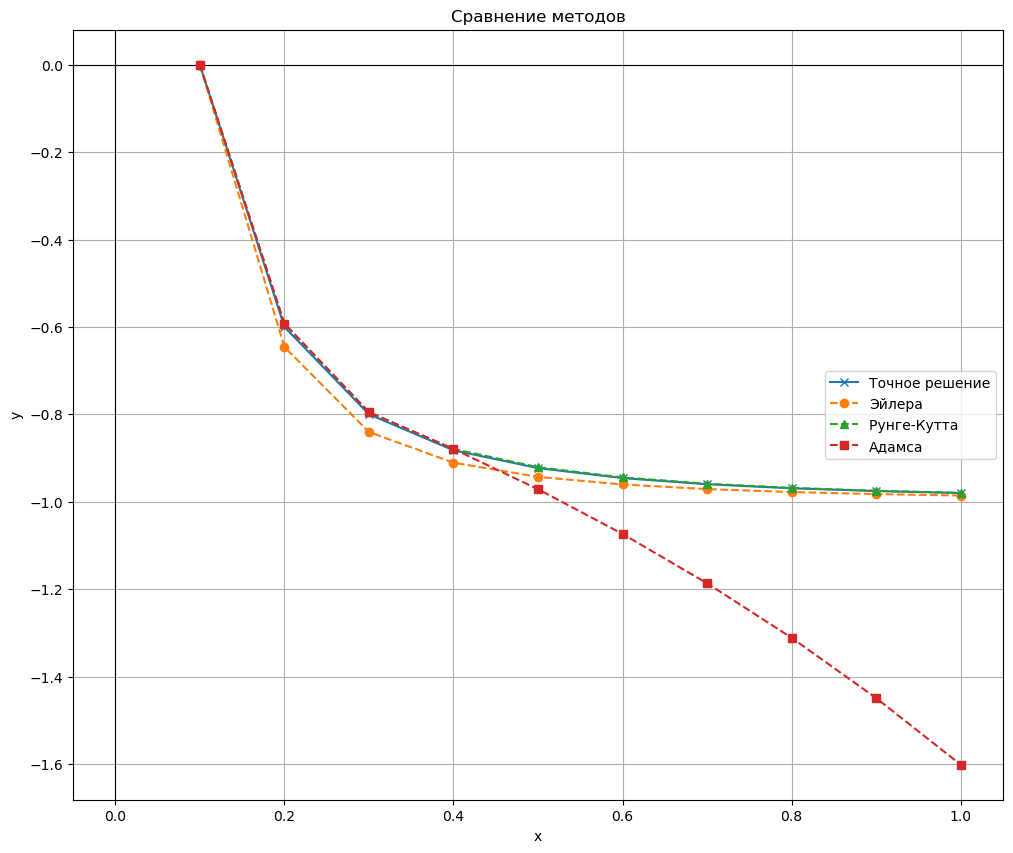

In [29]:
plt.figure(figsize=(12, 10))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Сравнение методов')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

plt.plot(x_val, y_val, 'x-', label='Точное решение')
plt.plot(x_val, y_euler, 'o--', label='Эйлера')
plt.plot(x_val, y_rng, '^--', label='Рунге-Кутта ')
plt.plot(x_val, y_adm, 's--', label='Адамса')

plt.legend()
plt.grid(True)
plt.show()

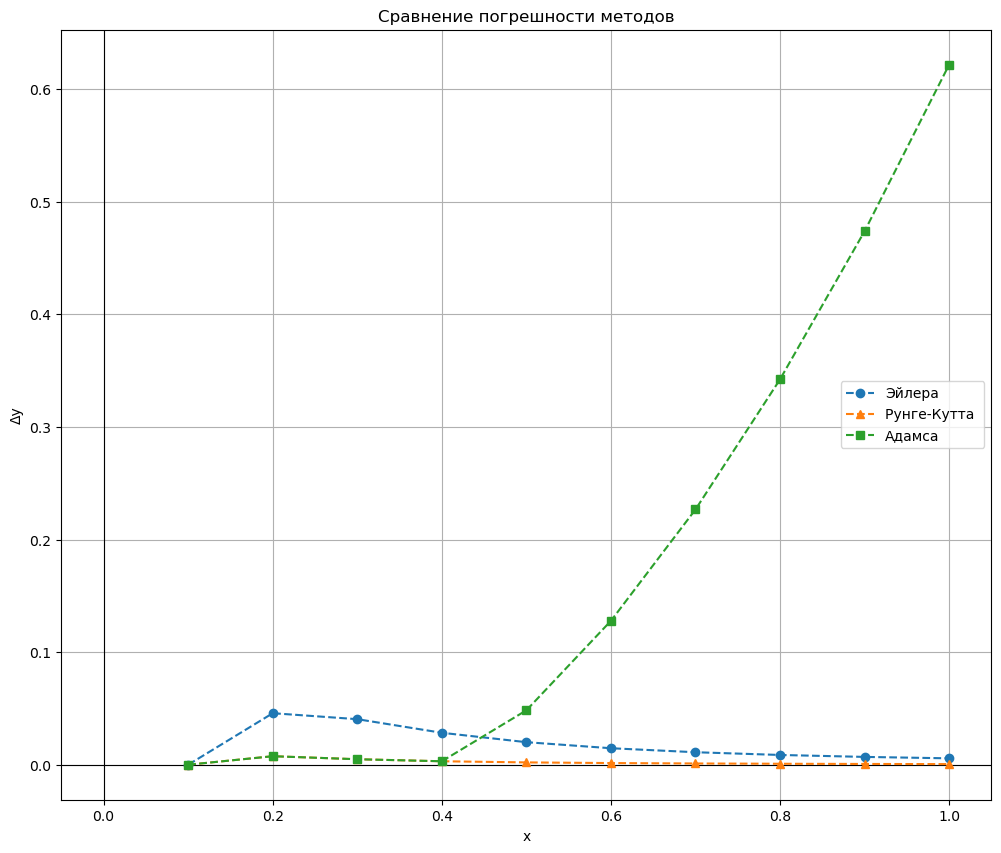

In [32]:
plt.figure(figsize=(12, 10))
plt.xlabel('x')
plt.ylabel('Δy')
plt.title('Сравнение погрешности методов')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

plt.plot(x_val, err_euler, 'o--', label='Эйлера')
plt.plot(x_val, err_mng, '^--', label='Рунге-Кутта ')
plt.plot(x_val, err_adm, 's--', label='Адамса')

plt.legend()
plt.grid(True)
plt.show()